In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier  # Add XGBoost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import pickle

In [2]:
#Load the Dataset
df = pd.read_csv("D:\Data\Churn Dataset fr ML.csv")
df


,Unnamed: 0,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,0,08729464-bde6-43bc-8f63-a357096feab1,56.0,Male,13,DSL,Yes,No,One year,Mailed check,71.88,931.49,No,No,Yes,No,No
1,1,af95bc95-baf4-4318-a21d-70d2ea3148b7,69.0,Male,13,DSL,No,Yes,Two year,Mailed check,110.99,1448.46,Yes,Yes,No,No,No
2,2,1fe7eee6-2227-4400-9998-4d993f4a60fd,46.0,Male,60,Fiber optic,No,Yes,Month-to-month,Mailed check,116.74,6997.73,Yes,Yes,No,No,No
3,3,f736fe7b-1b44-4acd-84c2-21c4aef648be,32.0,Female,57,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,78.16,4452.13,No,Yes,No,Yes,No
4,4,4b40d12d-7633-4309-96b8-aee675ea20ae,60.0,Male,52,Fiber optic,Yes,Yes,Two year,Electronic check,30.33,1569.73,Yes,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,3744,7d6b54f3-020a-4606-ac4e-a4c2dd3f1ac8,61.0,Male,59,Fiber optic,Yes,No,One year,Electronic check,61.14,3608.50,Yes,No,No,No,No
3745,3745,b65230c5-d1bf-4789-aefe-7244c6c5c153,36.0,Female,52,DSL,Yes,No,Month-to-month,Electronic check,34.15,1784.38,Yes,No,No,No,No
3746,3746,98313047-1f41-4f20-8f8d-f36bfde0ca1b,29.0,Male,19,NaN,Yes,No,Month-to-month,Credit card,30.79,594.41,No,No,No,No,No
3747,3747,e2fb6ab0-61b4-445f-b798-99f809c8eefa,25.0,Male,21,DSL,Yes,No,Month-to-month,Mailed check,80.56,1715.08,Yes,No,No,Yes,No


In [3]:
#Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3749 non-null   int64  
 1   CustomerID        3749 non-null   object 
 2   Age               3562 non-null   float64
 3   Gender            3749 non-null   object 
 4   Tenure            3749 non-null   int64  
 5   Service_Internet  3028 non-null   object 
 6   Service_Phone     3749 non-null   object 
 7   Service_TV        3749 non-null   object 
 8   Contract          3749 non-null   object 
 9   PaymentMethod     3562 non-null   object 
 10  MonthlyCharges    3749 non-null   float64
 11  TotalCharges      3749 non-null   float64
 12  StreamingMovies   3749 non-null   object 
 13  StreamingMusic    3749 non-null   object 
 14  OnlineSecurity    3749 non-null   object 
 15  TechSupport       3749 non-null   object 
 16  Churn             3749 non-null   object 


In [4]:
#Description of the Dataset
df.describe()

,Unnamed: 0,Age,Tenure,MonthlyCharges,TotalCharges
count,3749.000000,3562.000000,3749.000000,3749.000000,3749.000000
mean,1874.000000,43.655531,36.264070,75.844318,2718.968266
std,1082.387408,14.914474,20.505528,73.062971,3211.879149
min,0.000000,18.000000,1.000000,20.000000,13.190000
25%,937.000000,31.000000,19.000000,44.570000,1076.240000
50%,1874.000000,44.000000,36.000000,69.590000,2132.260000
75%,2811.000000,56.000000,54.000000,95.540000,3619.710000
max,3748.000000,69.000000,71.000000,1179.300000,79951.800000


In [5]:
#Information of Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3749 non-null   int64  
 1   CustomerID        3749 non-null   object 
 2   Age               3562 non-null   float64
 3   Gender            3749 non-null   object 
 4   Tenure            3749 non-null   int64  
 5   Service_Internet  3028 non-null   object 
 6   Service_Phone     3749 non-null   object 
 7   Service_TV        3749 non-null   object 
 8   Contract          3749 non-null   object 
 9   PaymentMethod     3562 non-null   object 
 10  MonthlyCharges    3749 non-null   float64
 11  TotalCharges      3749 non-null   float64
 12  StreamingMovies   3749 non-null   object 
 13  StreamingMusic    3749 non-null   object 
 14  OnlineSecurity    3749 non-null   object 
 15  TechSupport       3749 non-null   object 
 16  Churn             3749 non-null   object 


In [6]:
#Retrieving all columns in the dataset
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Gender', 'Tenure',
       'Service_Internet', 'Service_Phone', 'Service_TV', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'StreamingMovies',
       'StreamingMusic', 'OnlineSecurity', 'TechSupport', 'Churn'],
      dtype='object')

In [7]:
#Shape of the Data set (Rows,columns)
df.shape

(3749, 17)

In [8]:
#Checking for the missing Values in the Dataset
df.isnull().sum()

Unnamed: 0            0
CustomerID            0
Age                 187
Gender                0
Tenure                0
Service_Internet    721
Service_Phone         0
Service_TV            0
Contract              0
PaymentMethod       187
MonthlyCharges        0
TotalCharges          0
StreamingMovies       0
StreamingMusic        0
OnlineSecurity        0
TechSupport           0
Churn                 0
dtype: int64

In [9]:
# IMPUTATION OF Missing Values AND Drop of a column(Data Cleaning)

# Dropping the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Imputation of missing values in 'Age' with the median 
df['Age'] = df['Age'].fillna(df['Age'].median())

# Imputation of missing values in 'Service_Internet' with mode(most frequent)
most_frequent_service_internet = df['Service_Internet'].mode()[0]
df['Service_Internet'] = df['Service_Internet'].fillna(most_frequent_service_internet)

# Imputation missing values in 'PaymentMethod' with mode(most frequent)
most_frequent_payment_method = df['PaymentMethod'].mode()[0]
df['PaymentMethod'] = df['PaymentMethod'].fillna(most_frequent_payment_method)

# Verifying that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)

# Save the updated DataFrame to a new CSV file
df.to_csv('MLImputedDataset.csv', index=False)

CustomerID          0
Age                 0
Gender              0
Tenure              0
Service_Internet    0
Service_Phone       0
Service_TV          0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
StreamingMovies     0
StreamingMusic      0
OnlineSecurity      0
TechSupport         0
Churn               0
dtype: int64


In [10]:
# Verifying the dataframe structure after dropping the column and imputation of missing values
df.head(30)

,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,08729464-bde6-43bc-8f63-a357096feab1,56.0,Male,13,DSL,Yes,No,One year,Mailed check,71.88,931.49,No,No,Yes,No,No
1,af95bc95-baf4-4318-a21d-70d2ea3148b7,69.0,Male,13,DSL,No,Yes,Two year,Mailed check,110.99,1448.46,Yes,Yes,No,No,No
2,1fe7eee6-2227-4400-9998-4d993f4a60fd,46.0,Male,60,Fiber optic,No,Yes,Month-to-month,Mailed check,116.74,6997.73,Yes,Yes,No,No,No
3,f736fe7b-1b44-4acd-84c2-21c4aef648be,32.0,Female,57,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,78.16,4452.13,No,Yes,No,Yes,No
4,4b40d12d-7633-4309-96b8-aee675ea20ae,60.0,Male,52,Fiber optic,Yes,Yes,Two year,Electronic check,30.33,1569.73,Yes,No,Yes,Yes,No
5,0fece405-89c9-44a4-9ffb-29e55a4bbf55,25.0,Female,53,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,77.33,4107.57,Yes,No,Yes,No,No
6,8f55fd3f-ddad-4da9-9531-e0934968f712,38.0,Male,43,Fiber optic,Yes,No,Two year,Mailed check,79.76,3437.48,Yes,No,No,No,No
7,b4db2101-be85-4048-8201-659b9f3345a9,56.0,Male,42,DSL,No,Yes,Month-to-month,Bank transfer,98.92,4154.29,No,Yes,No,No,No
8,28177481-3920-402e-bb98-7ab632e9111f,36.0,Female,26,DSL,Yes,Yes,Month-to-month,Electronic check,24.82,662.63,No,No,Yes,Yes,No
9,a257f4af-3ca6-47c3-ae28-3e315a7b8b0f,40.0,Male,23,Fiber optic,Yes,Yes,Two year,Mailed check,66.63,1536.62,No,Yes,No,No,No


In [11]:
#Encoding of variables(Label Encoding)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

#Encoding the target variable (Churn)
le_churn = LabelEncoder()
df['Churn'] = le_churn.fit_transform(df['Churn'])  


In [12]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,114,56.0,1,13,0,1,0,1,3,71.88,931.49,0,0,1,0,0
1,2555,69.0,1,13,0,0,1,2,3,110.99,1448.46,1,1,0,0,0
2,459,46.0,1,60,1,0,1,0,3,116.74,6997.73,1,1,0,0,0
3,3609,32.0,0,57,1,1,1,0,0,78.16,4452.13,0,1,0,1,0
4,1053,60.0,1,52,1,1,1,2,2,30.33,1569.73,1,0,1,1,0
5,225,25.0,0,53,1,1,1,0,0,77.33,4107.57,1,0,1,0,0
6,2040,38.0,1,43,1,1,0,2,3,79.76,3437.48,1,0,0,0,0
7,2643,56.0,1,42,0,0,1,0,0,98.92,4154.29,0,1,0,0,0
8,575,36.0,0,26,0,1,1,0,2,24.82,662.63,0,0,1,1,0
9,2344,40.0,1,23,1,1,1,2,3,66.63,1536.62,0,1,0,0,0


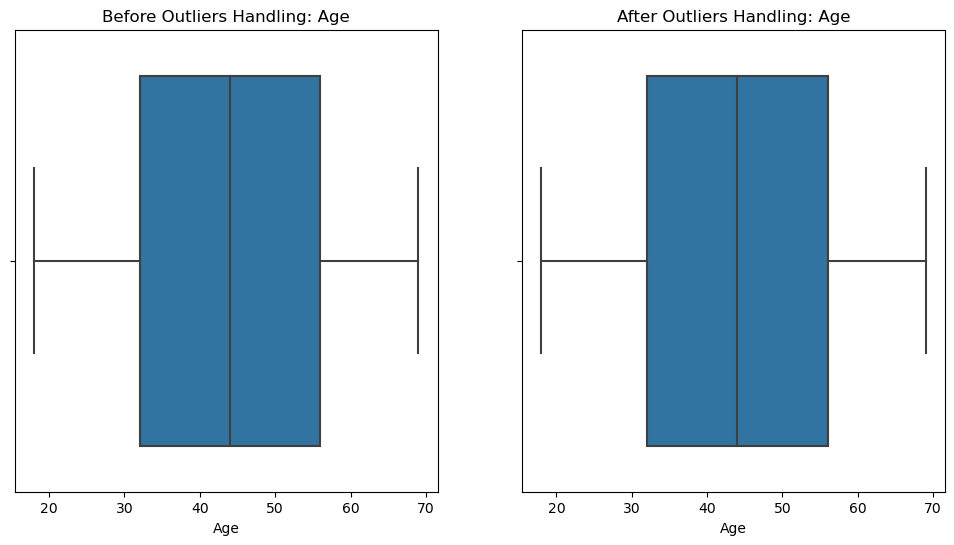

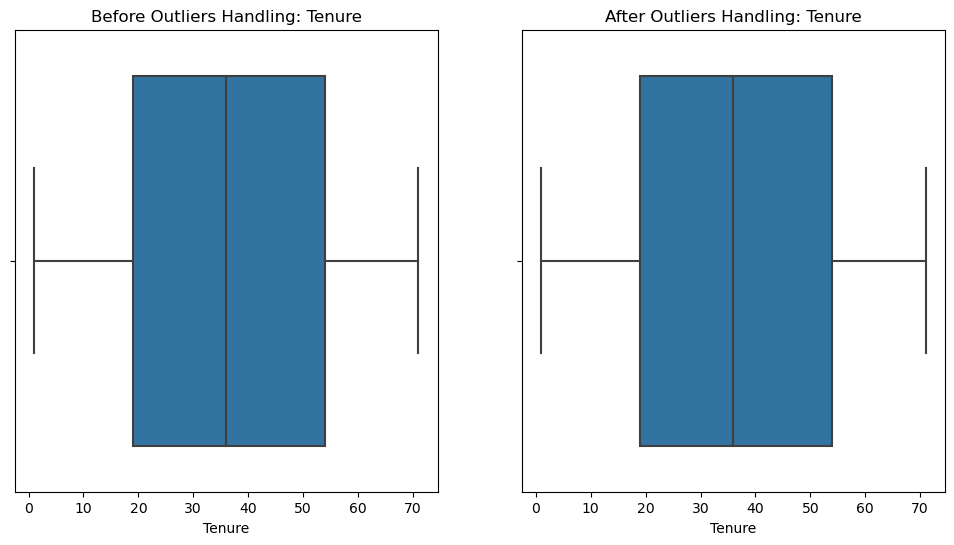

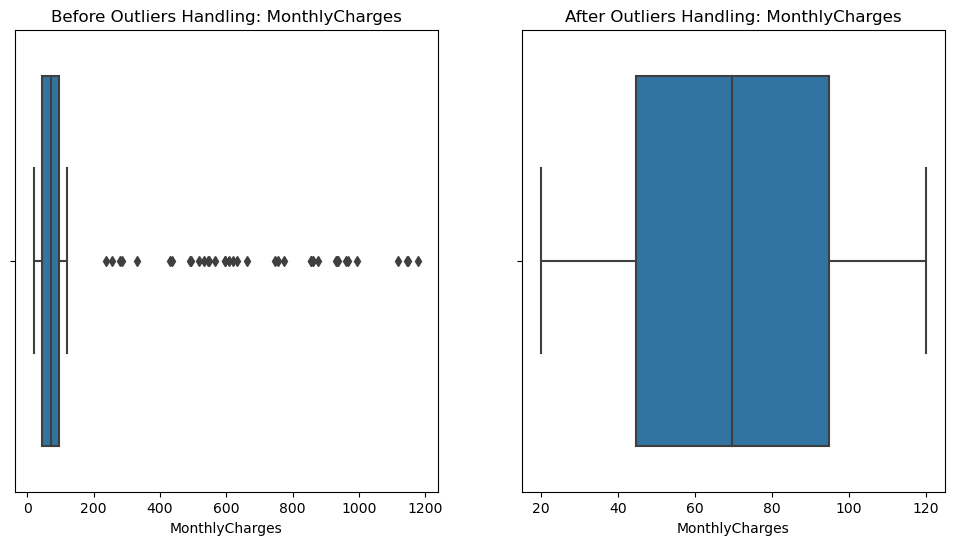

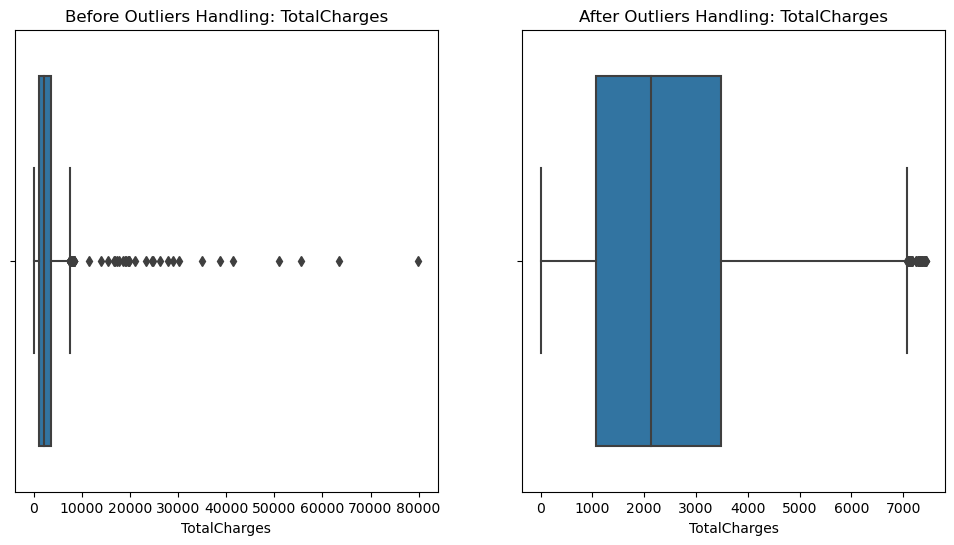

In [13]:
#Outliers detection and treatment of outliers
def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, df[col].median(), df[col])
    df[col] = np.where(df[col] > upper_bound, df[col].median(), df[col])

# Visualizing and treating outliers
def plot_outliers_before_after(col):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Before Outliers Handling: {col}')
    handle_outliers(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'After Outliers Handling: {col}')
    plt.show()
plot_outliers_before_after('Age')
plot_outliers_before_after('Tenure')
plot_outliers_before_after('MonthlyCharges')
plot_outliers_before_after('TotalCharges')


C:\Users\vanip\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


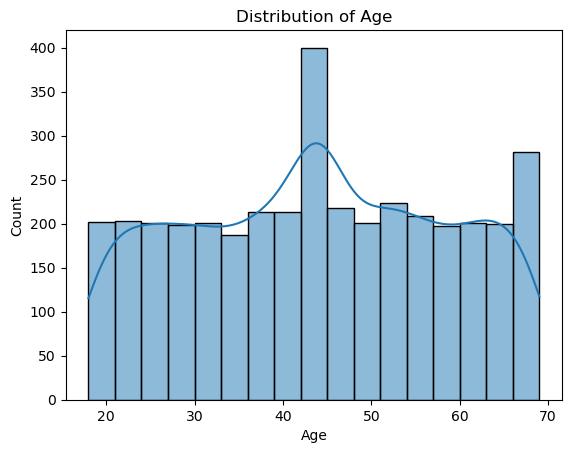

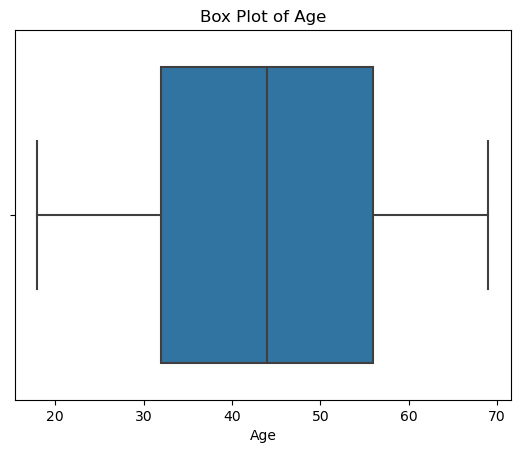

C:\Users\vanip\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


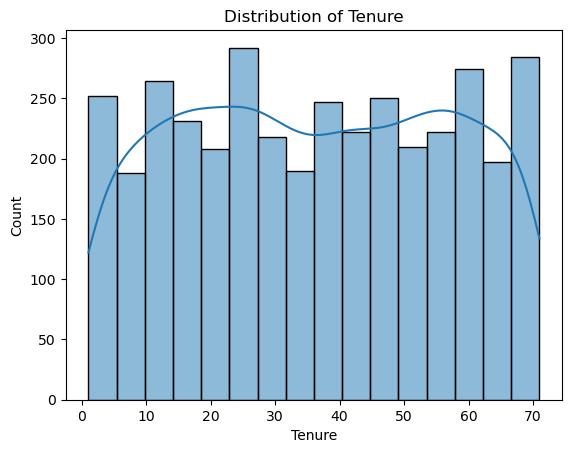

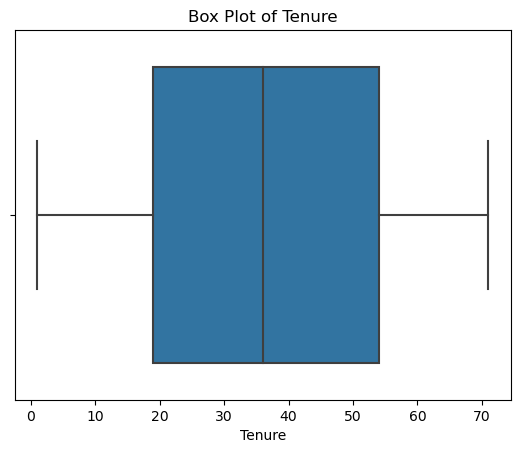

C:\Users\vanip\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


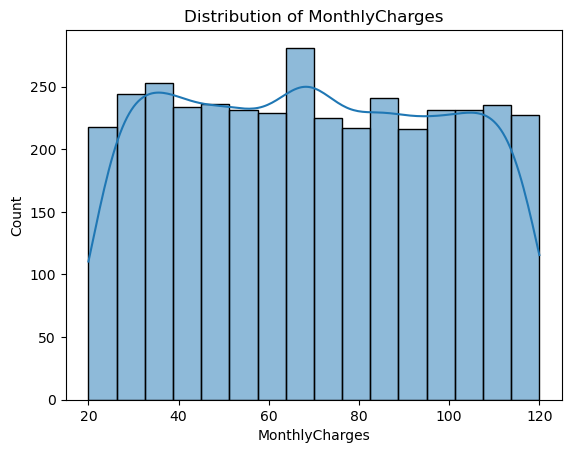

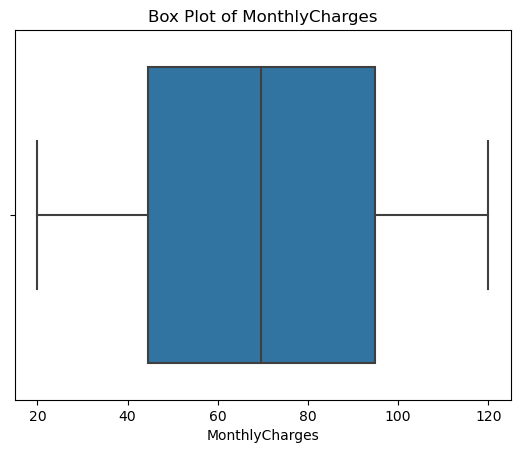

C:\Users\vanip\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


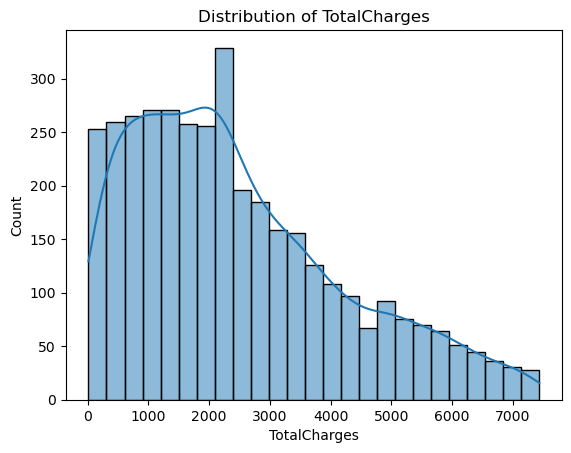

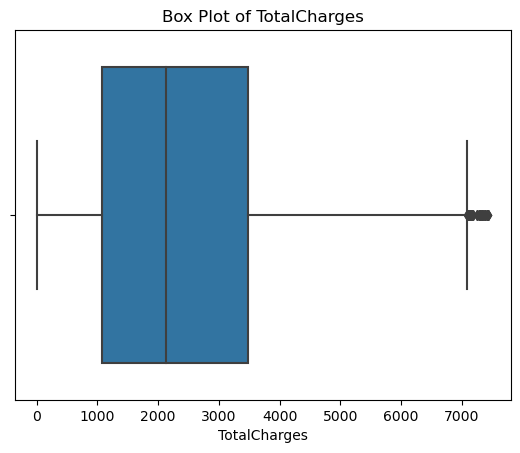

In [14]:
# List of numerical features
numerical_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

# Histograms and Box plots
for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
#Box-plot
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


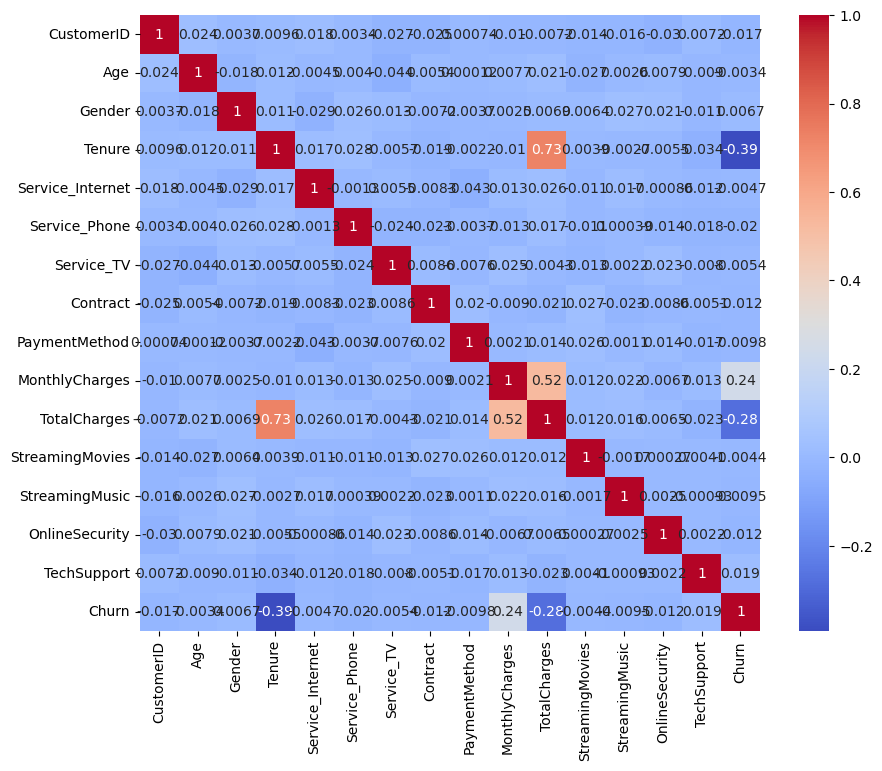

In [15]:
# Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
# Feature Engineering (Adding New interaction features)
df['Monthly_Tenure_Ratio'] = df['MonthlyCharges'] / (df['Tenure'] + 1)
df['Phone_Internet_Both'] = ((df['Service_Internet'] != 0) & (df['Service_Phone'] != 0)).astype(int)
df['TotalCharges_Age_Ratio'] = df['TotalCharges'] / (df['Age'] + 1)
df['Uses_Streaming'] = ((df['StreamingMovies'] != 0) | (df['StreamingMusic'] != 0)).astype(int)


# Saving the updated DataFrame to a new CSV file
df.to_csv('ML_updatedFeatureEngineeringDataset.csv', index=False)

# Displaying the dataframe with the new features added
print(df.head())

   CustomerID   Age  Gender  Tenure  Service_Internet  Service_Phone  \
0         114  56.0       1    13.0                 0              1   
1        2555  69.0       1    13.0                 0              0   
2         459  46.0       1    60.0                 1              0   
3        3609  32.0       0    57.0                 1              1   
4        1053  60.0       1    52.0                 1              1   

   Service_TV  Contract  PaymentMethod  MonthlyCharges  TotalCharges  \
0           0         1              3           71.88        931.49   
1           1         2              3          110.99       1448.46   
2           1         0              3          116.74       6997.73   
3           1         0              0           78.16       4452.13   
4           1         2              2           30.33       1569.73   

   StreamingMovies  StreamingMusic  OnlineSecurity  TechSupport  Churn  \
0                0               0               1          

In [17]:
# Assigning X as the DataFrame with the remaining  columns (excluding 'Churn')
X = df.drop(columns=['Churn'])

# Assigning y as the 'Churn' column
y = df['Churn']

# Print X and y
print("X (Columns DataFrame):")
print(X)
print("\nY (Churn Column):")
print(y)

#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Saving the split data into CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Train-Test split data saved to CSV files.")

X (Columns DataFrame):
      CustomerID   Age  Gender  Tenure  Service_Internet  Service_Phone  \
0            114  56.0       1    13.0                 0              1   
1           2555  69.0       1    13.0                 0              0   
2            459  46.0       1    60.0                 1              0   
3           3609  32.0       0    57.0                 1              1   
4           1053  60.0       1    52.0                 1              1   
...          ...   ...     ...     ...               ...            ...   
3744        1772  61.0       1    59.0                 1              1   
3745        2668  36.0       0    52.0                 0              1   
3746        2191  29.0       1    19.0                 1              1   
3747        3292  25.0       1    21.0                 0              1   
3748        2409  44.0       1    22.0                 1              1   

      Service_TV  Contract  PaymentMethod  MonthlyCharges  TotalCharges  \
0

In [18]:
#Feature Selection Using SelectKBest with Chi-Square Test
test = SelectKBest(score_func=chi2, k=11)
X_new = test.fit_transform(X, y)
features_SKB = pd.DataFrame({'Feature': list(X.columns), 'Ranking': test.scores_})
print(features_SKB.sort_values(by='Ranking', ascending=False))

                   Feature        Ranking
10            TotalCharges  370537.790336
15    Monthly_Tenure_Ratio   15025.094858
17  TotalCharges_Age_Ratio    9355.287944
3                   Tenure    6710.526939
9           MonthlyCharges    2539.519831
0               CustomerID     643.854528
14             TechSupport       0.780247
7                 Contract       0.534231
5            Service_Phone       0.439102
13          OnlineSecurity       0.339420
8            PaymentMethod       0.229804
16     Phone_Internet_Both       0.216927
1                      Age       0.214609
12          StreamingMusic       0.171462
2                   Gender       0.082627
18          Uses_Streaming       0.055767
6               Service_TV       0.045332
11         StreamingMovies       0.036121
4         Service_Internet       0.024715


In [19]:
#Feature Selection Using ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50).fit(X, y)
model = SelectFromModel(clf, threshold="median", prefit=True)
features_ETC = pd.DataFrame({'Feature': list(X.columns), 'Ranking': clf.feature_importances_})
print(features_ETC.sort_values(by='Ranking', ascending=False))


                   Feature   Ranking
15    Monthly_Tenure_Ratio  0.284871
3                   Tenure  0.190546
9           MonthlyCharges  0.182940
10            TotalCharges  0.124239
17  TotalCharges_Age_Ratio  0.066160
1                      Age  0.021457
0               CustomerID  0.019935
8            PaymentMethod  0.015806
7                 Contract  0.013606
2                   Gender  0.011337
6               Service_TV  0.010744
14             TechSupport  0.009064
13          OnlineSecurity  0.008670
4         Service_Internet  0.008091
11         StreamingMovies  0.007944
12          StreamingMusic  0.007565
5            Service_Phone  0.006104
16     Phone_Internet_Both  0.005861
18          Uses_Streaming  0.005060


In [20]:
def sequential_feature_selection(clf, X, y, n_features=5, direction='forward'):
    sfs = SequentialFeatureSelector(clf, n_features_to_select=n_features, direction=direction)
    sfs.fit(X, y)
    selected_features = X.columns[sfs.get_support()]
    X_sfs = sfs.transform(X)
    features_df = pd.DataFrame({'Selected Features': selected_features})
    return features_df, X_sfs

# Perform Sequential Feature Selection
features_sfs, X_sfs = sequential_feature_selection(clf, X, y, n_features=5, direction='forward')

# Display the selected features
print("Selected Features:")
print(features_sfs)

Selected Features:
      Selected Features
0                Tenure
1        MonthlyCharges
2       StreamingMovies
3        StreamingMusic
4  Monthly_Tenure_Ratio


C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression:
Avg Training Accuracy: 97.83% (+/- 0.28%)


C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model saved: Logistic Regression_before_tuning.pkl
Training Accuracy: 98.03%
Test Accuracy: 97.60%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2791
           1       0.87      0.84      0.86       208

    accuracy                           0.98      2999
   macro avg       0.93      0.92      0.92      2999
weighted avg       0.98      0.98      0.98      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       707
           1       0.79      0.79      0.79        43

    accuracy                           0.98       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.98      0.98      0.98       750

ROC AUC - Testing Set: 0.99


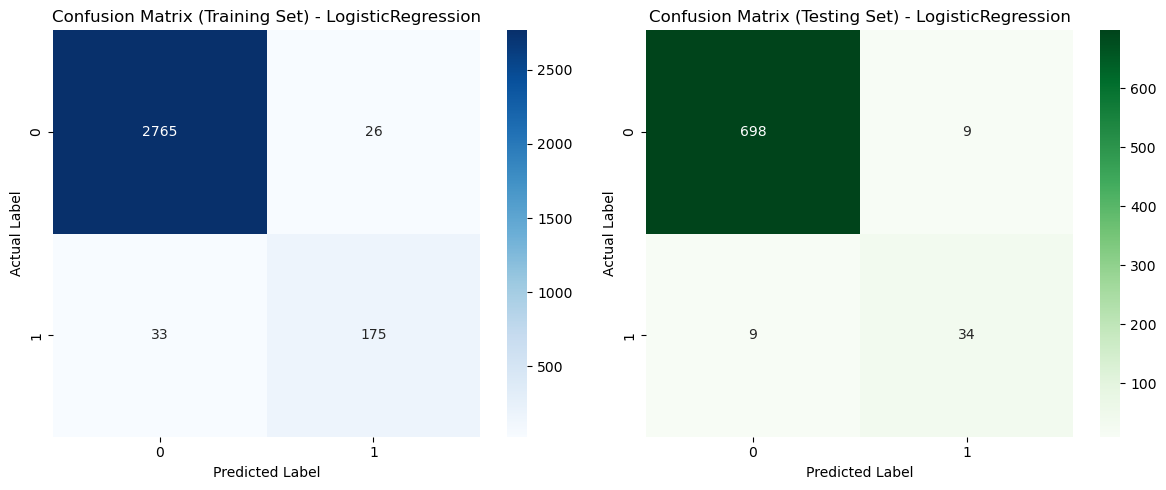

DecisionTreeClassifier:
Avg Training Accuracy: 99.87% (+/- 0.12%)
Model saved: Decision Tree_before_tuning.pkl
Training Accuracy: 100.00%
Test Accuracy: 99.87%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00       208

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750

ROC AUC - Testing Set: 0.99


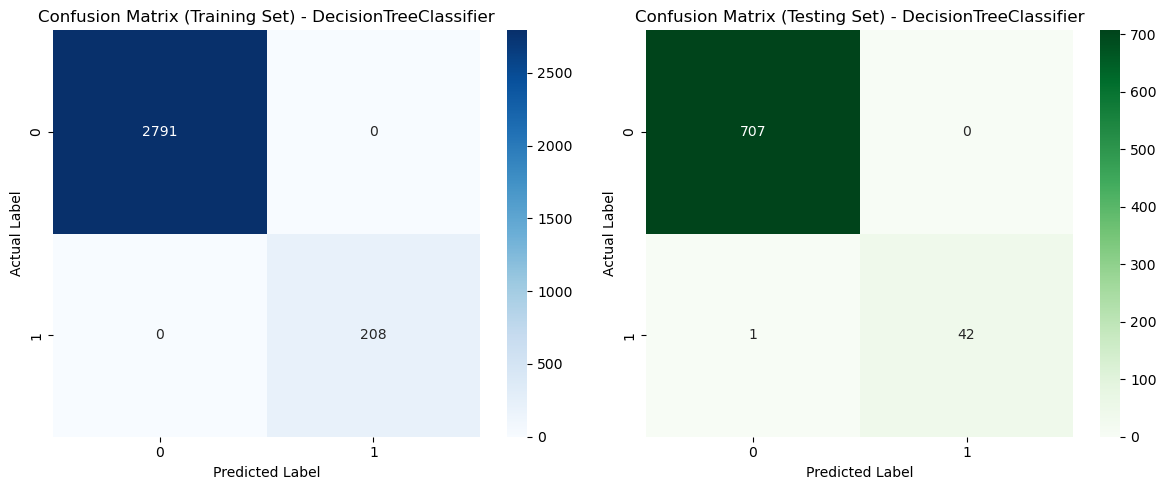

RandomForestClassifier:
Avg Training Accuracy: 99.87% (+/- 0.12%)
Model saved: Random Forest_before_tuning.pkl
Training Accuracy: 100.00%
Test Accuracy: 99.87%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00       208

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750

ROC AUC - Testing Set: 1.00


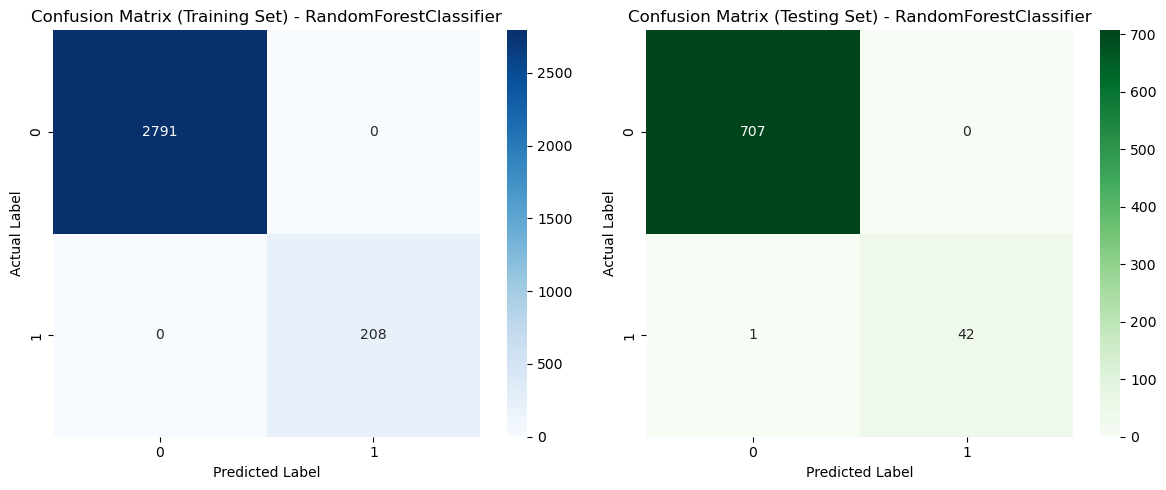

KNeighborsClassifier:
Avg Training Accuracy: 93.43% (+/- 0.23%)
Model saved: K-Neighbors_before_tuning.pkl
Training Accuracy: 95.20%
Test Accuracy: 93.87%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2791
           1       0.85      0.38      0.52       208

    accuracy                           0.95      2999
   macro avg       0.90      0.68      0.75      2999
weighted avg       0.95      0.95      0.94      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       707
           1       0.40      0.14      0.21        43

    accuracy                           0.94       750
   macro avg       0.67      0.56      0.59       750
weighted avg       0.92      0.94      0.92       750

ROC AUC - Testing Set: 0.86


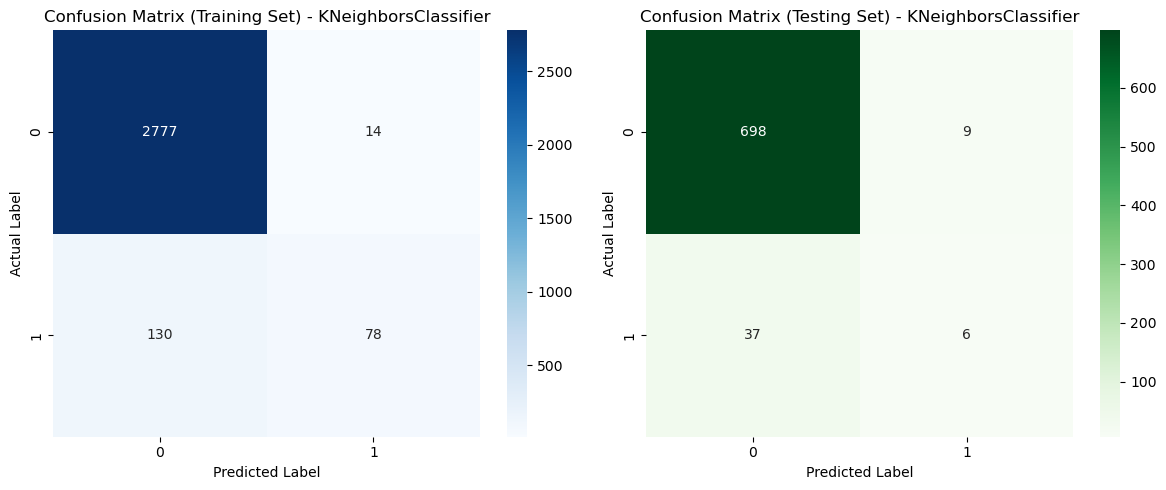

SVC:
Avg Training Accuracy: 93.06% (+/- 0.08%)
Model saved: SVM (RBF Kernel)_before_tuning.pkl
Training Accuracy: 93.06%
Test Accuracy: 94.27%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2791
           1       0.00      0.00      0.00       208

    accuracy                           0.93      2999
   macro avg       0.47      0.50      0.48      2999
weighted avg       0.87      0.93      0.90      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       707
           1       0.00      0.00      0.00        43

    accuracy                           0.94       750
   macro avg       0.47      0.50      0.49       750
weighted avg       0.89      0.94      0.91       750

ROC AUC - Testing Set: 1.00


C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metr

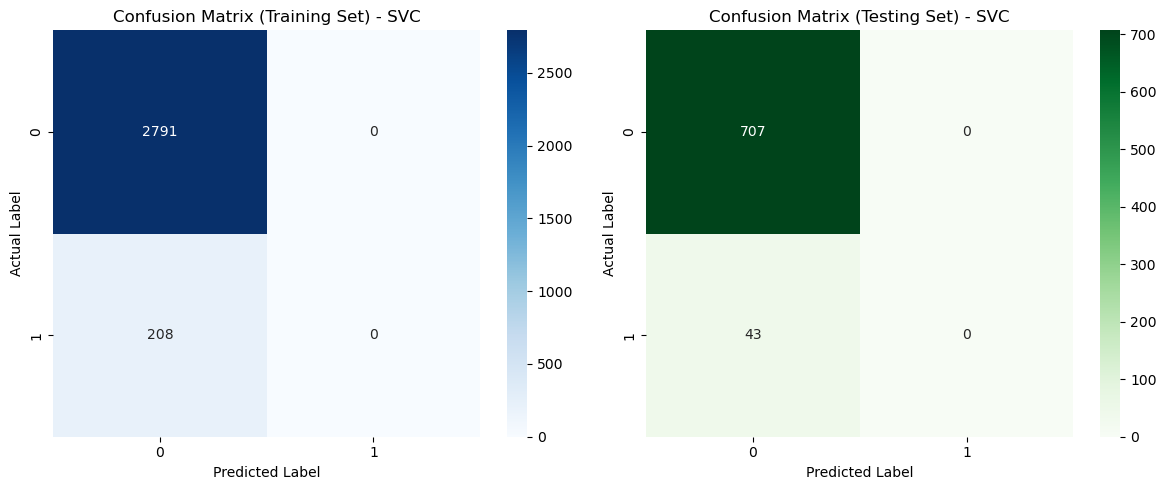

In [21]:
# Defining the models 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True)
}

# Function to save model using pickle
def save_model(model, model_name):
    with open(f"{model_name}.pkl", 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved: {model_name}.pkl")

# Function to perform cross-validation and print results
def perform_cross_validation(model, model_name, X_train, y_train, X_test, y_test, cv=5):
    # Perform cross-validation on the training set
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Printing average training accuracy from cross-validation
    print(f"{model.__class__.__name__}:")
    print(f"Avg Training Accuracy: {cv_results.mean() * 100:.2f}% (+/- {cv_results.std() * 100:.2f}%)")
    
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    
    # Save the model before hyperparameter tuning
    save_model(model, model_name + "_before_tuning")
    
    # Making predictions on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculation of training and test accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Generate confusion matrices
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    # Print training and test accuracies
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print()
    
    # Printing classification reports for both training and testing sets of data
    print("Classification Report - Training Set:")
    print(classification_report(y_train, y_train_pred))
    print("Classification Report - Testing Set:")
    print(classification_report(y_test, y_test_pred))
    
    # Calculation and printing of ROC-AUC score 
    if len(set(y_test)) == 2: 
        test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"ROC AUC - Testing Set: {test_roc_auc:.2f}")
    
    # Visualize confusion matrices
    plt.figure(figsize=(12, 5))
    
    # Training confusion matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap='Blues', fmt='g')
    plt.title(f"Confusion Matrix (Training Set) - {model.__class__.__name__}")
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    
    # Testing confusion matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap='Greens', fmt='g')
    plt.title(f"Confusion Matrix (Testing Set) - {model.__class__.__name__}")
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.tight_layout()
    plt.show()

#  perform crossvalidation function for each model and save separately:
for model_name, model in models.items():
    perform_cross_validation(model, model_name, X_train, y_train, X_test, y_test)

Hyperparameter tuning for Logistic Regression...


C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model saved: Logistic Regression_after_tuning.pkl


C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression:
Avg Training Accuracy: 98.40% (+/- 0.38%)
Training Accuracy: 98.53%
Test Accuracy: 97.73%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2791
           1       0.93      0.86      0.89       208

    accuracy                           0.99      2999
   macro avg       0.96      0.93      0.94      2999
weighted avg       0.98      0.99      0.99      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       707
           1       0.81      0.79      0.80        43

    accuracy                           0.98       750
   macro avg       0.90      0.89      0.89       750
weighted avg       0.98      0.98      0.98       750

ROC AUC - Testing Set: 1.00


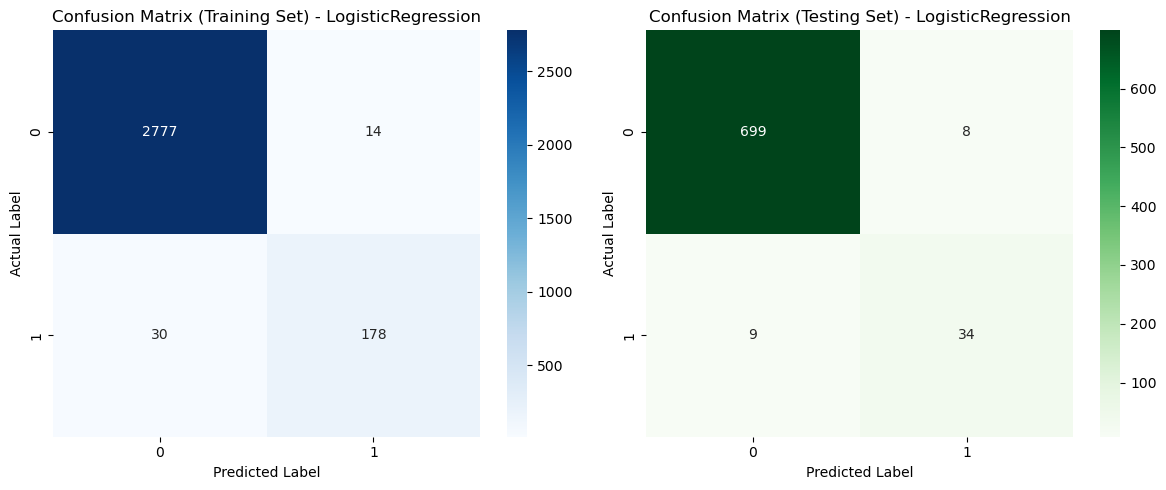

Hyperparameter tuning for Decision Tree...
Model saved: Decision Tree_after_tuning.pkl
DecisionTreeClassifier:
Avg Training Accuracy: 99.83% (+/- 0.11%)
Training Accuracy: 100.00%
Test Accuracy: 99.87%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00       208

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750

ROC AUC - Testing Set: 0.99


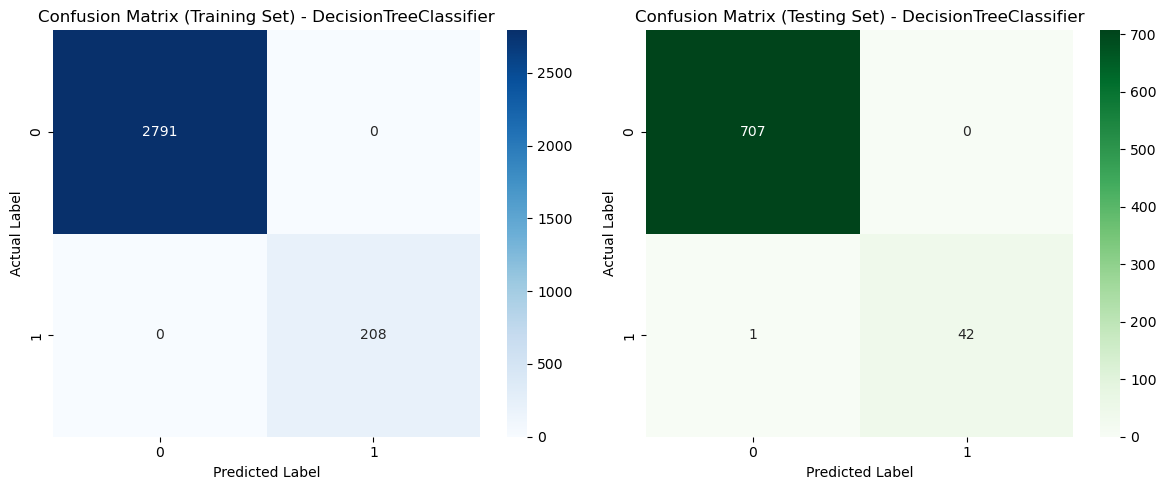

Hyperparameter tuning for Random Forest...
Model saved: Random Forest_after_tuning.pkl
RandomForestClassifier:
Avg Training Accuracy: 99.87% (+/- 0.12%)
Training Accuracy: 100.00%
Test Accuracy: 99.87%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00       208

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750

ROC AUC - Testing Set: 1.00


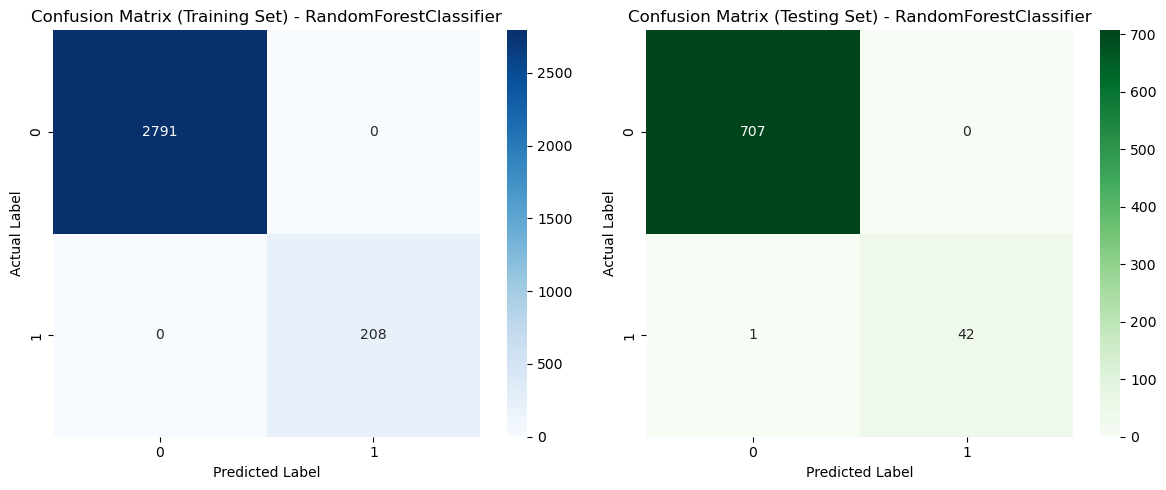

Hyperparameter tuning for K-Neighbors...
Model saved: K-Neighbors_after_tuning.pkl
KNeighborsClassifier:
Avg Training Accuracy: 93.83% (+/- 0.30%)
Training Accuracy: 100.00%
Test Accuracy: 94.53%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2791
           1       1.00      1.00      1.00       208

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       707
           1       0.56      0.23      0.33        43

    accuracy                           0.95       750
   macro avg       0.76      0.61      0.65       750
weighted avg       0.93      0.95      0.93       750

ROC AUC - Testing Set: 0.88


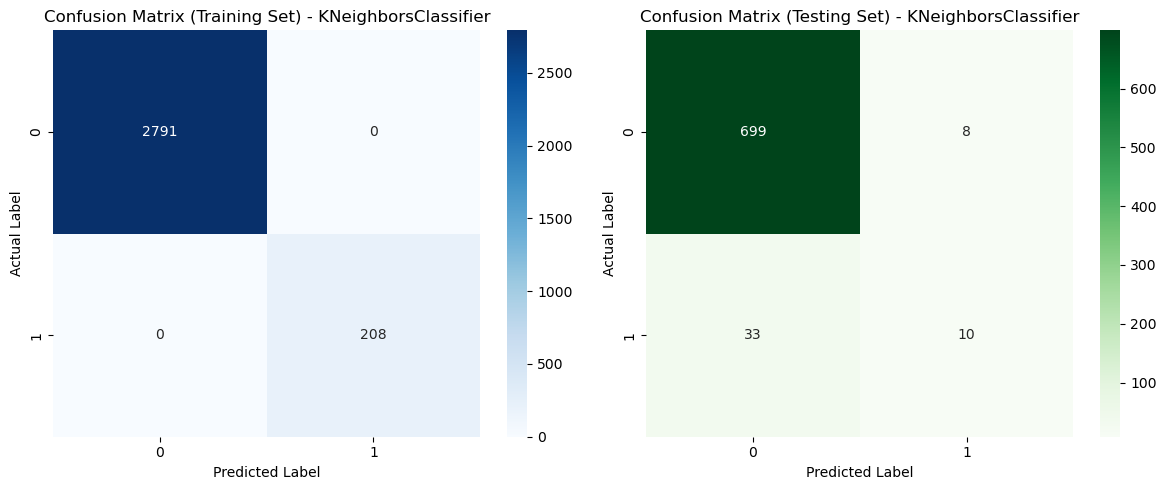

Hyperparameter tuning for SVM (RBF Kernel)...
Model saved: SVM (RBF Kernel)_after_tuning.pkl
SVC:
Avg Training Accuracy: 93.06% (+/- 0.08%)
Training Accuracy: 93.06%
Test Accuracy: 94.27%

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2791
           1       0.00      0.00      0.00       208

    accuracy                           0.93      2999
   macro avg       0.47      0.50      0.48      2999
weighted avg       0.87      0.93      0.90      2999

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       707
           1       0.00      0.00      0.00        43

    accuracy                           0.94       750
   macro avg       0.47      0.50      0.49       750
weighted avg       0.89      0.94      0.91       750

ROC AUC - Testing Set: 1.00


C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanip\anaconda3\lib\site-packages\sklearn\metr

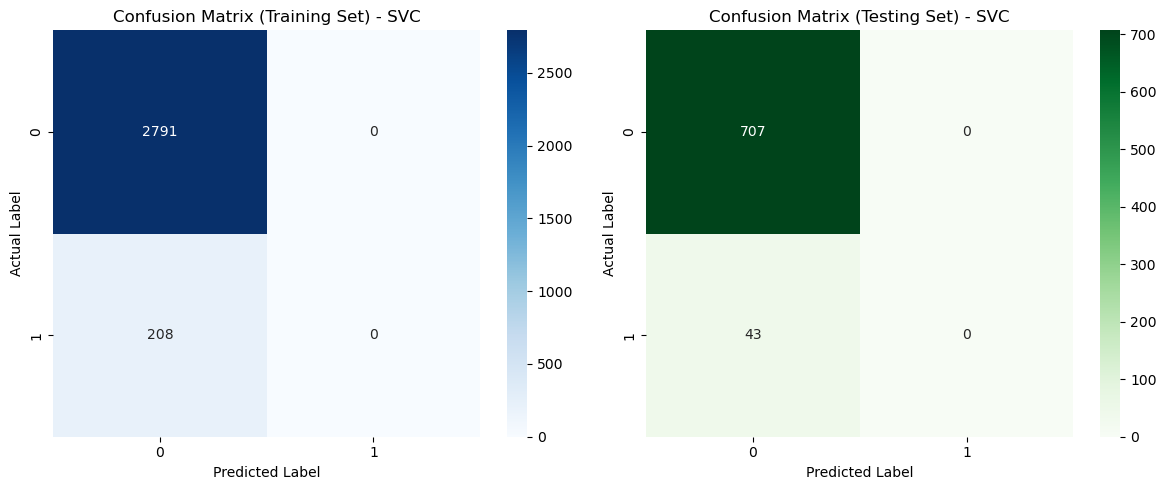

In [22]:
# Defining the models 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True)
}

# Defining the hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'K-Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'SVM (RBF Kernel)': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
}

# Function to save model using pickle
def save_model(model, model_name):
    with open(f"{model_name}_after_tuning.pkl", 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved: {model_name}_after_tuning.pkl")

# Function to perform hyperparameter tuning, cross-validation, and print results
def perform_hyperparameter_tuning_and_evaluation(model, model_name, param_grid, X_train, y_train, X_test, y_test, cv=5):
# Perform GridSearchCV for hyperparameter tuning
    print(f"Hyperparameter tuning for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # To Get the best model after tuning
    best_model = grid_search.best_estimator_
    
    # Save the model after hyperparameter tuning
    save_model(best_model, model_name)
    
    # To Perform cross-validation on the training set with the best model
    cv_results = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')

    # Print average training accuracy from cross-validation
    print(f"{model.__class__.__name__}:")
    print(f"Avg Training Accuracy: {cv_results.mean() * 100:.2f}% (+/- {cv_results.std() * 100:.2f}%)")
    
    # Making predictions on training and test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Generation of confusion matrices
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    # Print training and test accuracies
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print()
    
    # Printing classification reports for both training and testing sets of data
    print("Classification Report - Training Set:")
    print(classification_report(y_train, y_train_pred))
    print("Classification Report - Testing Set:")
    print(classification_report(y_test, y_test_pred))
    
    # Calculation and printing of ROC-AUC score 
    if len(set(y_test)) == 2:  # Check if it's a binary classification problem
        test_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        print(f"ROC AUC - Testing Set: {test_roc_auc:.2f}")
    
    # Visualize confusion matrices
    plt.figure(figsize=(12, 5))
    
    # Training confusion matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap='Blues', fmt='g')
    plt.title(f"Confusion Matrix (Training Set) - {model.__class__.__name__}")
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    
    # Testing confusion matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap='Greens', fmt='g')
    plt.title(f"Confusion Matrix (Testing Set) - {model.__class__.__name__}")
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    
    plt.tight_layout()
    plt.show()

# Perform hyperparameter tuning and cross-validation for each model and save the best models:

for model_name, model in models.items():
    perform_hyperparameter_tuning_and_evaluation(model, model_name, param_grids[model_name], X_train, y_train, X_test, y_test)